## Винные обзоры

In [1]:
# импортируем необходимые пакеты

import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('C:\VS CODE\GIT\sf-1\EDA\wine.csv', sep=',') # чтение данных

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\arinathebest\AppData\Local\Temp\ipykernel_8324\3929429722.py:1: SyntaxWarning: invalid escape sequence '\V'
  df = pd.read_csv('C:\VS CODE\GIT\sf-1\EDA\wine.csv', sep=',') # чтение данных


### Задание 5.1

Составьте чек-лист всех этапов жизненного цикла модели машинного обучения для создания ИИ-сомелье. 
Подробно раскройте процесс разведывательного анализа данных с подэтапами. 


* Определение бизнес-проблемы
* Сбор данных
* Очистка данных от пропусков/выбросов/аномалий
* Разведывательный анализ данных
    + проектирование признаков (генерация из внешних источников данных, из признаков датасета)
    + кодирование признаков
    + проверка статистических гипотез
    + отбор признаков
* Разработка модели
* Вывод модели в продакшн


### Задание 5.2

Проанализируйте представленный датасет и перечислите все числовые признаки

In [ ]:
df.nunique() # смотрим на кол-во уникальных признаков

In [ ]:
df.info() # посмотрим на типы признаков. Претендента всего 2: points, price

Смотрим на описание признаков и на распределение, чтобы точно убедиться, что они числовые:

array([[<Axes: title={'center': 'points'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

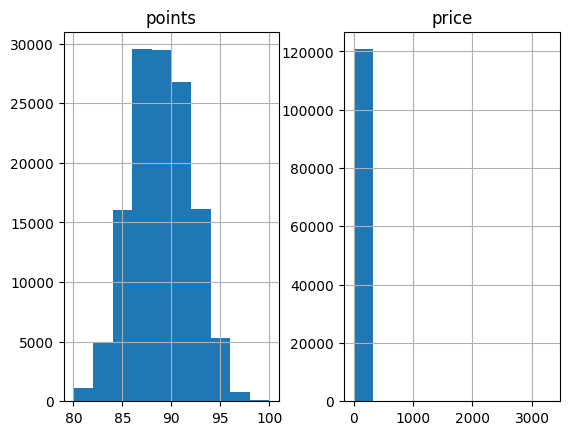

In [4]:
# построим распеределение всех возможных признаков быстрой просто визуализацией
hist = df.hist()
hist

Ответ: points, price

### Задание 5.3

Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их. 
В поле ниже введите, сколько дублирующихся записей вам удалось обнаружить. 


In [5]:
mask = df.duplicated(subset=df.columns) # маска для фильтрации
data_duplicates = df[mask] # фильтруем наш датасет
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')
df = df.drop_duplicates()

Число найденных дубликатов: 9983


### Задание 5.4

Проверьте датасет на наличие пропусков в данных.
В каких из представленных признаках были обнаружены пропуски?


In [11]:
df.info() # смотрим краткую информацию о наборе данных и даем ответ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129971 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


### Задание 5.5

Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в  PYTHON-14. Очистка данных:

Воспользуйтесь правилами:
    
+ Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных.
+ Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
+ Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.


<Axes: >

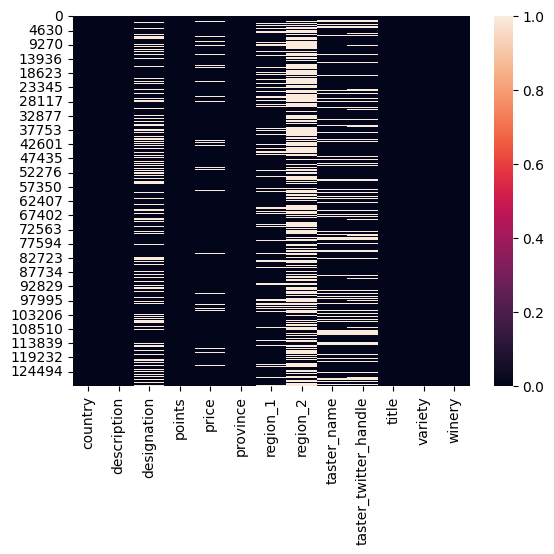

In [6]:
sns.heatmap(df.isnull()) # наглядная карта пропусков

In [ ]:
df = df.drop(['region_2'], axis=1) # имеет порядка 60% пропусков, лучше избавиться от такого признака

In [ ]:
sns.heatmap(df.isnull()) # смотрим, какие признаки остались

In [ ]:
df.head()

In [10]:
df.describe(include='all')

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
count,129971,129971,129971,129971.000000,129971.000000,129971,129971,129971,129971,129971,129971,129971
unique,44,119955,37980,NaN,NaN,426,1230,20,16,118840,708,16757
top,US,"Seductively tart in lemon pith, cranberry and ...",unknown,NaN,NaN,California,unknown,unknown,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,37465,NaN,NaN,36247,21247,26244,31213,11,13272,222
mean,NaN,NaN,NaN,88.447138,32.846481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039730,40.639061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

df['designation'] = df['designation'].fillna('unknown')
df['region_1'] = df['region_1'].fillna('unknown')
df['taster_name'] = df['taster_name'].fillna('unknown')
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
df['country'] = df['country'].fillna('US')
df['price'] = df['price'].fillna(df['price'].mean())
df['province'] = df['province'].fillna('California')
df['variety'] = df['variety'].fillna('Pinot Noir')

In [ ]:
df.info()

In [ ]:
# в числовом признаке выберем метод замены средним значением
df['price'] = df['price'].fillna(df['price'].mean())

In [ ]:
sns.heatmap(df.isnull()) # убеждаемся, что датасет без пропусков

In [ ]:
df = df.to_csv('wine_cleared.csv', index=False) # сохраняем очищенный датасет для дальнейшей работы